In [2]:
try: 
    import pandas as pd
    import numpy as np  
    import random 
    import matplotlib.pyplot as plt
    from rich import print as rprint

except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install',  'pandas', 'numpy', 'matplotlib',  'rich' ])
    # Una vez instaladas las bibliotecas, intenta importarlas nuevamente
    import pandas as pd
    import numpy as np  


[
    [7.401361496589963, 15.273391095148762, 76.3114647415423],
    [15.273391095148762, 32.42179658210257, 161.99835107770966],
    [76.3114647415423, 161.99835107770966, 810.1102641815966]
]

[
    [1.020408163265306, 1.0060858716926735, 1.0056244832343404],
    [1.0060858716926735, 1.0204081632653057, 1.0199852997066834],
    [1.0056244832343404, 1.0199852997066834, 1.0204081632653057]
]

XX - XY - XZ - 
YX - YY - YZ - 
ZX - ZY - ZZ - 

std de x: 2.6932014901707904
std de y: 5.636786376159782
std de z: 28.176374126171112

covarianza xy: 15.273391095148762
covarianza xz: 76.3114647415423
covarianza yz: 161.99835107770966


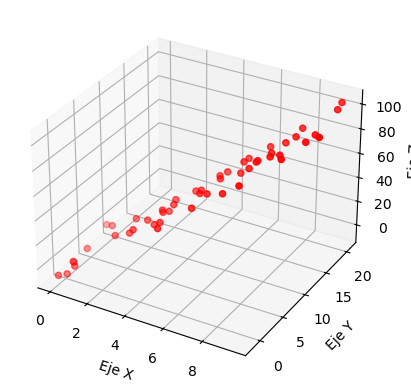

[
    [7.093296873498335, 1.0497411701384147, 0.48652881117581465],
    [1.0497411701384147, 8.82576022383061, 0.06008660985931665],
    [0.48652881117581465, 0.06008660985931665, 6.964759181628025]
]

[
    [1.020408163265306, 0.13538047203786496, 0.07063262830716449],
    [0.13538047203786496, 1.0204081632653061, 0.007820283749970664],
    [0.07063262830716449, 0.007820283749970664, 1.020408163265306]
]

XX - XY - XZ - 
YX - YY - YZ - 
ZX - ZY - ZZ - 

std de x: 2.636556643811843
std de y: 2.94095988060939
std de z: 2.612558898473959

covarianza xy: 1.0497411701384147
covarianza xz: 0.48652881117581465
covarianza yz: 0.06008660985931665


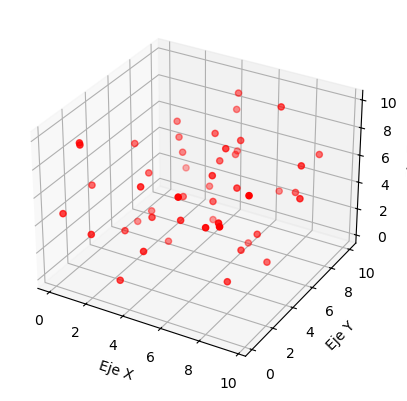

[
    [7.1676214041436515, -13.801577878994944, -69.7245356066997],
    [-13.801577878994944, 27.37527308374762, 138.25094198678113],
    [-69.7245356066997, 138.25094198678113, 699.1661048593243]
]

[
    [1.0204081632653064, -1.0053931124942397, -1.0050365198381808],
    [-1.0053931124942397, 1.020408163265306, 1.0197004486830281],
    [-1.0050365198381808, 1.0197004486830281, 1.020408163265306]
]

XX - XY - XZ - 
YX - YY - YZ - 
ZX - ZY - ZZ - 

std de x: 2.650333748051512
std de y: 5.179552839973029
std de z: 26.175996308873096

covarianza xy: -13.801577878994944
covarianza xz: -69.7245356066997
covarianza yz: 138.25094198678113


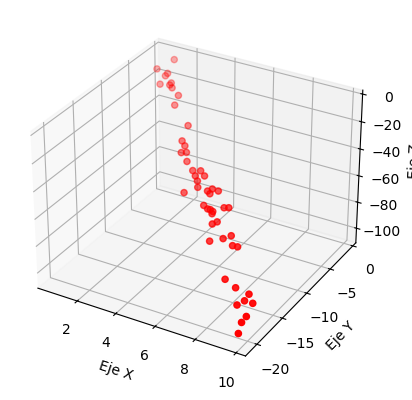

In [3]:
def covariance(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return  np.sum((x - mean_x)*(y - mean_y)) / len(x)

def desviacion_std(x):
    mean_x = np.mean(x)
    return np.sqrt(np.sum((x - mean_x)**2) / len(x))
    
#Con correlacion positiva 
x = np.random.rand(50) * 10  # Variable X
y = 2 * x + np.random.normal(0, 1, 50)  # Variable Y con relación lineal con X
z = 5 * y + np.random.normal(0, 1, 50)
#Con correlacion cero
x_0 = np.random.rand(50) * 10  # Variable X
y_0 = np.random.rand(50) * 10  # Variable Y sin relación con X o Z
z_0 = np.random.rand(50) * 10  # Variable Z sin relación con X o Y
#Con correlación negativa
x_neg = np.random.rand(50) * 10  # Variable X
y_neg = -2 * x_neg + np.random.normal(0, 1, 50)  # Variable Y con relación negativa con X
z_neg = 5 * y_neg + np.random.normal(0, 1, 50)  # Variable Z con relación negativa con Y

def covariance_corr(x,y,z):
    std_x = np.std(x)
    std_y = np.std(y)
    std_z = np.std(z)


    df = pd.DataFrame({'X':x, 'Y':y, 'Z':z})
    variables = ['X', 'Y', 'Z']

    matriz_cov = []
    matriz_corr = []
    for variable in variables:
        cov_list = []
        corr_list = []
        for v in variables:
            cov = df[variable].cov(df[v])
            sigma_x = desviacion_std(df[variable])
            sigma_y = desviacion_std(df[v])
            corr_list.append(cov / (sigma_x * sigma_y))
            cov_list.append(cov)
        matriz_cov.append(cov_list)
        matriz_corr.append(corr_list)

    rprint(matriz_cov)
    rprint(matriz_corr)

    for variable in variables:
        for v in variables:
            print(variable,v, end=' - ', sep='')
        print()
    print()
    print(f"std de x: {std_x}")
    print(f"std de y: {std_y}")
    print(f"std de z: {std_z}")

    print()

    print(f"covarianza xy: {matriz_cov[0][1]}")
    print(f"covarianza xz: {matriz_cov[0][2]}")
    print(f"covarianza yz: {matriz_cov[1][2]}")

    # Crear la figura y el eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos
    ax.scatter(x, y, z, c='r', marker='o')

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    plt.show()

covariance_corr(x,y,z)
covariance_corr(x_0,y_0,z_0)
covariance_corr(x_neg,y_neg,z_neg)